# Change the Runtime to GPU

On the top nav-bar, choose `Runtme`, click on `change runtime type`, and under `Hardware accelerator` choose GPU.


# Create a Repository on DAGsHub 🏗 

- We will start by [creating a new repository](https://dagshub.com/repo/create) on DAGsHub.

<center>
<img src="https://dagshub.com/nirbarazida/images/raw/22ffadf74508f2f8626a528ea55f0fbf3d43f941/colab-mlflow/create-a-repo.png" height="700"/> 
</center>

<center><b>Congratulations</b> - you created your first DAGsHub repository! 🥳 </center>



In [1]:
import requests
from getpass import getpass
import datetime

**Set Environment Variables**


In [2]:
#@title Enter the repository name for the project:
REPO_NAME= "test_dag" #@param {type:"string"}

In [3]:
#@title Enter the repository name for the project:
REPO_OWNER= "aviad8040" #@param {type:"string"}

In [4]:
#@title Enter the username of your DAGsHub account:
USER_NAME = "aviad8040" #@param {type:"string"}

In [5]:
import os
from getpass import getpass

In [6]:
# 776832adb6c692c4a2fe99c402f55a3adf431341
os.environ['MLFLOW_TRACKING_USERNAME'] = 'aviad8040'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '776832adb6c692c4a2fe99c402f55a3adf431341'

In [7]:
# ! pip install mlflow
import mlflow

In [8]:
mlflow.set_tracking_uri('https://dagshub.com/aviad8040/test_dag.mlflow')

# Model 🪐

In [10]:
! pip install tensorflow

     |████████████████████████████████| 458.4 MB 36 kB/s  eta 0:00:01    |███▌                            | 50.8 MB 1.0 MB/s eta 0:06:44     |█████████▊                      | 139.1 MB 846 kB/s eta 0:06:18     |██████████████████████████      | 372.7 MB 91 kB/s eta 0:15:36
     |████████████████████████████████| 4.4 MB 387 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 242 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 270 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 285 kB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 597 kB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 544 kB/s eta 0:00:01
     |████████████████████████████████| 132 kB 213 kB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 114 kB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 357 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 383 kB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 3

In [11]:
import tensorflow as tf
import IPython
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2021-08-17 13:28:47.056833: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-17 13:28:47.056867: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Import the Data Files

![](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)

In [12]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11501568/11490434 [==============================] - 6s 1us/step


/tmp/ipykernel_21402/344507488.py:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=value, xy=(x, y), ha='center', va='center', color=color)


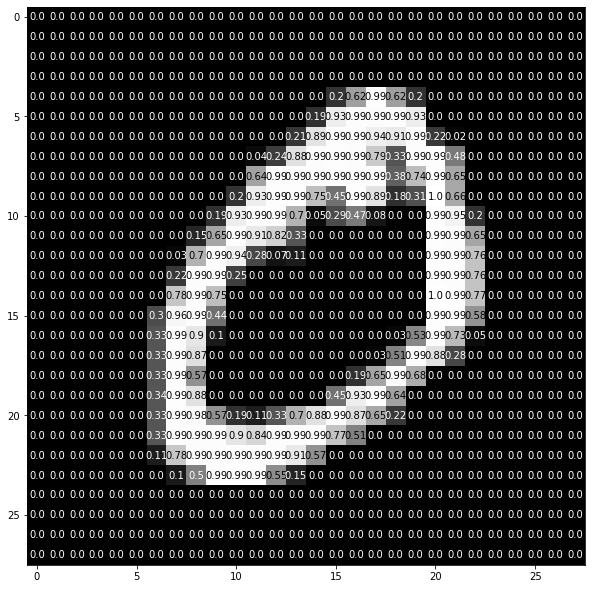

In [13]:
image = np.reshape(X_train[1], [28, 28])
image_array = np.asarray(image)
fig, ax = plt.subplots(figsize=(10, 15))
img = ax.imshow(image_array, cmap='gray')

for x in range(28):
    for y in range(28):
        value = round(image[y][x], 2)
        color = 'black' if value > 0.5 else 'white'
        ax.annotate(s=value, xy=(x, y), ha='center', va='center', color=color)

## Configure a Tensorflow Model

In [14]:
batch_size = 32
validation_split=0.2
epochs=50
optimizer='adam'
metrics=['accuracy']

In [15]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2021-08-17 13:29:18.900343: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2021-08-17 13:29:18.900396: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jrock): /proc/driver/nvidia/version does not exist


In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

In [18]:
# lets log before trainning
mlflow.tensorflow.autolog()
# mlflow.log_metric("task",2)

2021/08/17 13:29:52 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


## Train the Model

In [19]:
model.fit(X_train, y_train, batch_size= batch_size, validation_split=validation_split, epochs=epochs,verbose=0)

2021-08-17 13:29:58.883570: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-17 13:29:58.883614: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-17 13:29:58.887094: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-08-17 13:29:59.137260: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.
2021/08/17 13:30:13 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/jrock/anaconda3/lib/python3.8/site-packages/mlflow/tensorflow.py:781: UserWarning: Logging to MLflow failed: HTTPSConnectionPool(host='dagshub.com', port=443): Max retries exceeded with url: /aviad8040/test_dag.mlflow/api/2.0/mlflow/runs/log-parameter (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1131)')))"
2021-08-17 13:30:56.652341: I tensorflow/compiler/mlir/mlir_graph_op

2021-08-17 13:30:57.136598: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-08-17 13:30:57.136632: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-08-17 13:30:57.142085: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-08-17 13:30:57.146395: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-08-17 13:30:57.149476: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /tmp/tmpcgdfrw6x/train/plugins/profile/2021_08_17_13_30_57

2021-08-17 13:30:57.150540: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /tmp/tmpcgdfrw6x/train/plugins/profile/2021_08_17_13_30_57/jrock.trace.json.gz
2021-08-17 13:30:57.156167: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /tmp/tmpcgdfrw6x/train/plugins/profile/2021_08_17_13_30_57



INFO:tensorflow:Assets written to: /tmp/tmpa6dlzdga/model/data/model/assets


2021/08/17 13:34:08 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed, possibly due older server version. The model artifacts have been logged successfully under ./artifacts/259/7e5aef3159f745deb03243b2bddfbff4/artifacts. In addition to exporting model artifacts, MLflow clients 1.7.0 and above attempt to record model metadata to the  tracking store. If logging to a mlflow server via REST, consider  upgrading the server version to MLflow 1.7.0 or above.


# Finish Line 🏁

**Congratulations**  - You made it to the finish line! 🥳

In this section, we covered how to track experiments with MLflow to DAGsHub servers. If you want to start fast with DAGsHub, this [notebook](https://colab.research.google.com/drive/1JJIwAH0TBSY49um5s2FD0GEA6bw3SKrd#scrollTo=XcU2y1F_Hyub) is for you.  <br><br>

More resources that can interest you:
- [DAGsHub Docs](https://dagshub.com/docs/).
- [Get Started Tutorial](https://dagshub.com/docs/getting-started/overview/).
- [DAGsHub Blog](https://dagshub.com/blog/).
- [FAQ](https://dagshub.com/docs/faq/).

<br>

We hope that this Tutorial was helpful and made the onboarding process easier for you. If you found an issue in the notebook, please [let us know](https://dagshub.com/DAGsHub-Official/DAGsHub-Issues/issues/). If you have any questions feel free to join our [Discord channel](https://discord.com/invite/9gU36Y6) and ask there. We can't wait to see what remarkable project you will create and share with the Data Science community!
<br><br>